In [2]:
import numpy as np
# import torch
import matplotlib.pyplot as plt

In [51]:
# simu_data = np.load('simu.npy',allow_pickle=True)
# simu_data

In [16]:
lam = lambda t:(np.sin(t*2*np.pi), np.cos(t*2*np.pi), 1.5*np.sin(t*2*np.pi)*np.cos(t*2*np.pi))
#lam = lambda t:(np.sin(t), np.cos(t))

#print(lam(2))
# U0 = np.array([ [1.0, 1.0, 0.5],
#          [-1.5, 1.0, 1.0],
#          [1.0, -1.5, 1.0]])

# U1 = np.array([ [-0.5,1.0, 0.1],
#          [1.0, 0.5, 1.0],
#          [0.10, 0.8, -0.5]])


U0 = np.array([ [1.0, 1.0, 1.0],
         [1.0, 1.0, 1.0],
         [1.0, 1.0, 1.0]])

U1 = np.array([ [1,1.0, 1.0],
         [1.0, 1.0, 1.0],
         [1.0, 1.0, 1.0]])


U = [U0, U1]
dims = [3,3]
N = 1000
N_test = 500
N_sample_max = 3000
time_points_train = np.sort(np.random.rand(N))#np.linspace(0, 1, N)
# time_points_train = np.linspace(0, 1, N)

time_points_train[0] = 0.00
time_points_test = np.sort(np.random.rand(N_test))

In [17]:
train_ind = []
train_y = []
train_time_ind = []
noise = 0.05

test_ind = []
test_y = []
test_time_ind = []

t_train = 0
while True:

    if t_train>=N:
        break

    n_sample = np.random.randint(2,4)
    lam_t = np.array( lam(time_points_train[t_train]) )

    for sample in range(n_sample):
        i = np.random.randint(0,dims[0])
        j = np.random.randint(0,dims[1])
        
        # lam_t = np.array( lam(time_points_train[t_train]) )
        val = np.sum(U[0][i,:]*U[1][j,:]*lam_t) + np.random.randn()*noise
        # val = np.sum(U[0][i,:]*U[1][j,:]) + np.random.randn()*noise

        train_ind.append([i,j])
        train_y.append(val)
        train_time_ind.append(t_train)

    t_train = t_train + 1


t_test = 0
while True:
    
    if t_test>=N_test:
        break

    n_sample = np.random.randint(1,4)
    lam_t = np.array( lam(time_points_test[t_test]) )

    for sample in range(n_sample):
        i = np.random.randint(0,dims[0])
        j = np.random.randint(0,dims[1])
        
    
        val = np.sum(U[0][i,:]*U[1][j,:]*lam_t) + np.random.randn()*noise
        # val = np.sum(U[0][i,:]*U[1][j,:]) + np.random.randn()*noise

        test_ind.append([i,j])
        test_y.append(val)
        test_time_ind.append(t_test)

    t_test = t_test + 1



In [18]:
data = {'train_ind':np.array(train_ind), \
        'train_y':np.array(train_y),\
        'train_time_uni':time_points_train,\
        'train_time':time_points_train[train_time_ind],\
        'train_time_ind':np.array(train_time_ind),\
        'test_ind':np.array(test_ind), \
        'test_y':np.array(test_y),\
        'test_time_uni':time_points_test,       
        'test_time':time_points_test[test_time_ind],\
        'test_time_ind':np.array(test_time_ind),\
        'ndims':[3,3],\
        'U':U}
np.save('../simu_data/simu_CP_multi_sincos.npy', data)

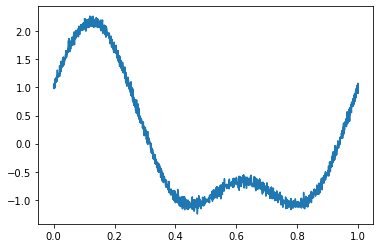

In [19]:
plt.plot(time_points_train[train_time_ind],train_y)

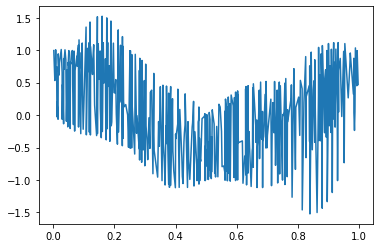

In [44]:
plt.plot(time_points_test,test_y)